# Africa Food Production

It is widely known that Africa has a good vegetation for agricultural activities. Most countries in Africa produce their own food crops such as wheat, maize, millet, rice, yam and so on. They export some of thier products to neighbouring countries and the international community for economic purposes.

This document shows a detailed analysis of the dataset using various exploratory data analysis methods and visualization tools

Let's import the libraries that will be needed in this analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the dataset

df1 = pd.read_csv('1646901118287_acdf14167dd0f4c1f000.csv')
df1.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [4]:
df1.columns

Index(['Country', 'Item', 'Year', 'Value'], dtype='object')

In [5]:
#changing from the Year column format
df1['Year'] = pd.to_datetime(df1['Year'],format = '%Y')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  23110 non-null  object        
 1   Item     23110 non-null  object        
 2   Year     23110 non-null  datetime64[ns]
 3   Value    23110 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 722.3+ KB


In [7]:
df1.describe()['Value']

count    23110.000000
mean       327.785201
std       1607.940343
min          0.000000
25%          3.000000
50%         18.000000
75%        108.000000
max      54000.000000
Name: Value, dtype: float64

In [8]:
#How many unique countries do we have in this dataset
df1['Country'].value_counts()

United Republic of Tanzania    790
Morocco                        770
South Africa                   750
Kenya                          750
Egypt                          700
Madagascar                     690
Cameroon                       650
Cote d'Ivoire                  640
Zimbabwe                       640
Mozambique                     620
Tunisia                        610
Nigeria                        610
Ethiopia                       600
Benin                          590
Algeria                        580
Ghana                          580
Uganda                         560
Togo                           560
Angola                         540
Sudan                          540
Senegal                        520
Sierra Leone                   500
Congo                          500
Guinea                         500
Malawi                         480
Zambia                         480
Mali                           480
Rwanda                         460
Mauritius           

This shows that the countries don't produce the same things

For a period of 10 years, some countries prouduced more than others

In [9]:
items_produced = pd.DataFrame(df1['Country'].value_counts())
no_of_items_produced = (items_produced/10).astype(int)
no_of_items_produced.rename(columns = {'Country':'Number of Items produced per year'})

,Number of Items produced per year
United Republic of Tanzania,79
Morocco,77
South Africa,75
Kenya,75
Egypt,70
Madagascar,69
Cameroon,65
Cote d'Ivoire,64
Zimbabwe,64
Mozambique,62


# Removing Outliers
Some countries appear to be producing zero values in a year. This is a likely outlier.

Some countries also appear to be producing enormous values in a year and we might have to drop those values or assume that the countries are able to prouduce such huge amount of products

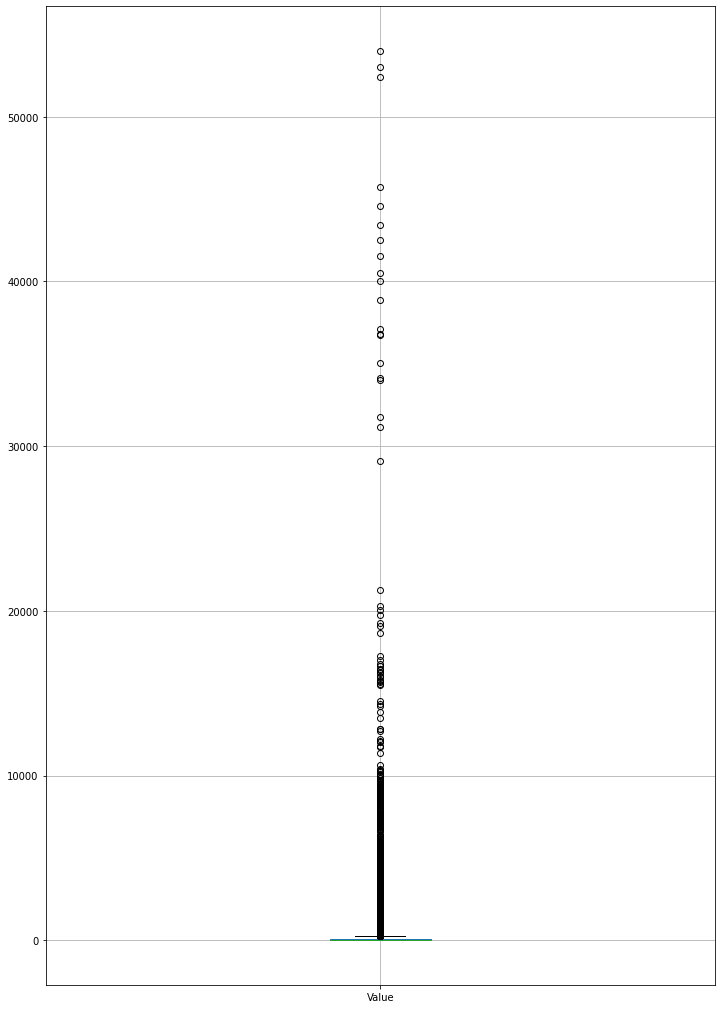

In [10]:
plt.figure(figsize=(12,18))
df1.boxplot('Value');

In [11]:
low,high = df1["Value"].quantile([0.4,1])
print(low)
print(high)

9.0
54000.0


The highest and the lowest values produced in this dataset are 54_000 and 9 respectively.

The country that produced 54_000 for a singular item might have truly produced it because of the location or vegetation or labour. Therefore, this value can be kept but the lower value(9) can be dropped because a whole nation cannot produce just 9 values for a whole year.

In [12]:
df1 = df1[df1['Value'].between(low,high)]

In [13]:
# What top 10 items produced by each country?

pd.DataFrame(df1.groupby(['Country','Item'])['Value'].max().sort_values(ascending=False)[:10])

Value
Country      Item                        
Nigeria      Cassava and products   54000
             Yams                   40500
South Africa Sugar cane             21265
Egypt        Sugar cane             17014
Angola       Cassava and products   16412
Ghana        Cassava and products   15990
South Africa Maize and products     12815
Nigeria      Maize and products     10400
Egypt        Tomatoes and products  10279
Mozambique   Cassava and products   10094

As seen in the table above, Nigeria is the largest producer of cassava & products, Yams and Maize & products. Nigeria also had the highest recorded value for production.

The table shows the top items produced by each country.

In [14]:
#What year did Nigeria produce a value of 54000

df1[(df1['Country'] == 'Nigeria') & (df1['Value'] == 54_000)]

,Country,Item,Year,Value
15448,Nigeria,Cassava and products,2012-01-01,54000


Nigeria had the highest production value in 2012

In [15]:
#dropping the Year column
df1 = df1.set_index(df1['Year'])
df1.drop(columns = ['Year'],inplace = True)


In [16]:
#finding the total number of years the data was obtained
df1.index.max().year - df1.index.min().year + 1

10

In [17]:
df1

,Country,Item,Value
Year,,,
2004-01-01,Algeria,Wheat and products,2731
2005-01-01,Algeria,Wheat and products,2415
2006-01-01,Algeria,Wheat and products,2688
2007-01-01,Algeria,Wheat and products,2319
2008-01-01,Algeria,Wheat and products,1111
...,...,...,...
2009-01-01,Zimbabwe,Freshwater Fish,13
2010-01-01,Zimbabwe,Freshwater Fish,13
2011-01-01,Zimbabwe,Freshwater Fish,18


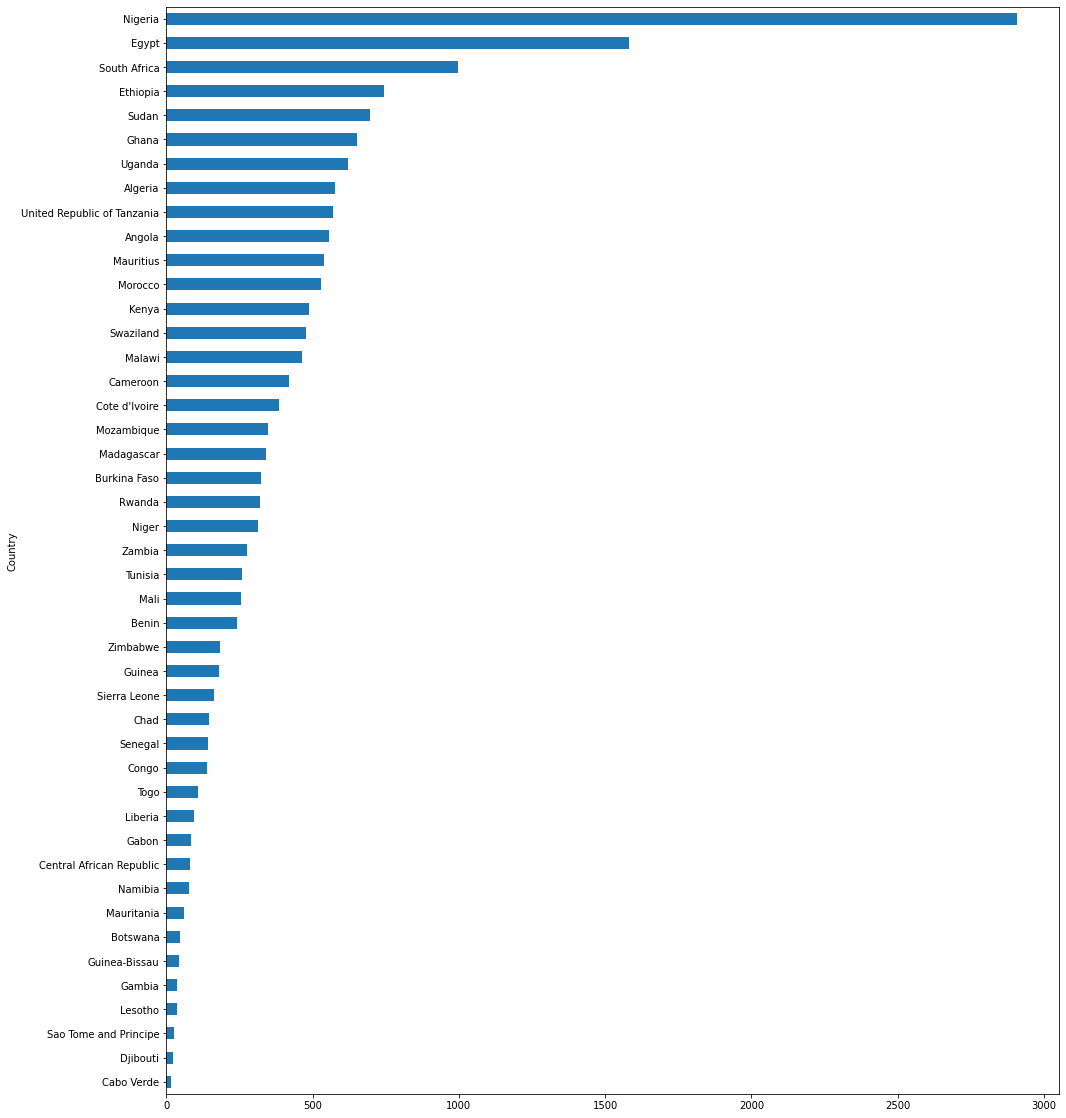

In [18]:
#Investigating the mean of values for each country

plt.figure(figsize = (16,20))
df1.groupby('Country')['Value'].mean().sort_values().plot(kind='barh');

From the bar plot above, Nigeria had the the highest average of values while cabo verde had the least.

In [19]:
#The mean for Nigeria is calculated below

df1.groupby('Country')['Value'].mean()['Nigeria']

2906.9607142857144

In [20]:
df1.groupby('Country')['Value'].mean()['Cabo Verde']

16.833333333333332

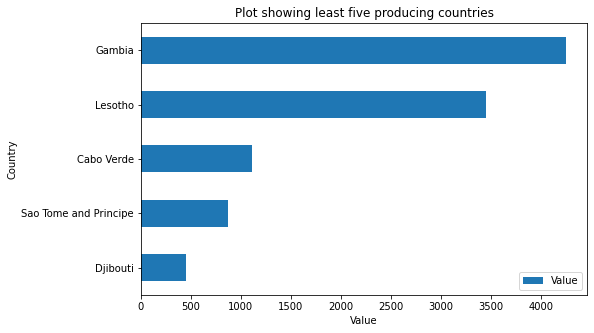

In [21]:
#Bar plot showing the least countries that produced items
fig,ax = plt.subplots(figsize = (8,5))
df1.groupby(['Country']).sum().sort_values(by = 'Value',ascending=True)[:5].plot(kind='barh',ax=ax)
plt.xlabel('Value')
plt.title('Plot showing least five producing countries');

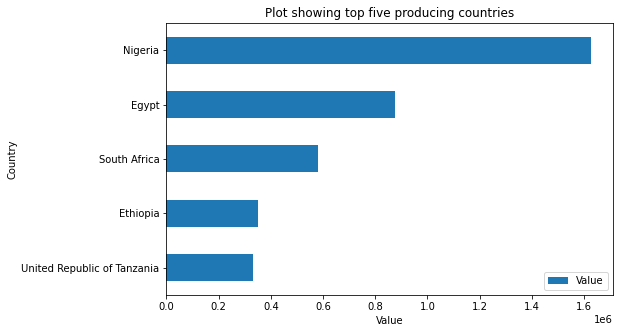

In [22]:
# Bar plot showing the top five countries that produced more 
fig,ax = plt.subplots(figsize = (8,5))
df1.groupby(['Country']).sum().sort_values(by = 'Value',ascending=True)[-5:].plot(kind='barh',ax=ax)
plt.xlabel('Value')
plt.title('Plot showing top five producing countries');

In [23]:
df1[(df1['Country']=='Djibouti')].groupby('Country')['Value'].sum()

Country
Djibouti    448
Name: Value, dtype: int64

In [24]:
pd.DataFrame(df1[df1['Country']=='Djibouti'].sort_values(by='Value',ascending = False)['Item'].unique()[:5],columns = ['Top Products Produced in Djibouti'],index = np.arange(1,3))

,Top Products Produced in Djibouti
1,"Vegetables, Other"
2,Milk - Excluding Butter


The table above shows that Djibouti is only a good producer of vegetables and milk

In [25]:
pd.DataFrame(df1[df1['Country']=='Nigeria'].sort_values(by='Value',ascending = False)['Item'].unique()[:5],columns = ['Top Five Products Produced in Nigeria'],index = np.arange(1,6))

,Top Five Products Produced in Nigeria
1,Cassava and products
2,Yams
3,Maize and products
4,Sorghum and products
5,"Beverages, Fermented"


The table above shows the top five products that Nigeria produces

# Food Supply/Consumption Dataset

Let's talk about supply of food and consumption

This dataset contains only the country, year and value columns

In [26]:
#africa supply
df2 = pd.read_csv('1646899450109_7a8814167de36d41f000.csv')
df2.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [27]:
#changing the format of the year column
df2['Year']= pd.to_datetime(df2['Year'], format = '%Y')

In [28]:
#setting the year column as the new index and dropping the year column

df2 = df2.set_index(df2['Year'])
df2.drop(columns = ['Year'],inplace = True)


In [29]:
#The sum of productions for each year
df1.groupby([df1.index]).sum()

,Value
Year,
2004-01-01,660758
2005-01-01,689010
2006-01-01,716408
2007-01-01,703417
2008-01-01,734573
2009-01-01,744724
2010-01-01,784357
2011-01-01,810144
2012-01-01,839594


In [30]:
#The sum of supply for each year
df2.groupby([df2.index]).sum()

,Value
Year,
2004-01-01,107740
2005-01-01,108418
2006-01-01,109386
2007-01-01,110149
2008-01-01,110734
2009-01-01,111700
2010-01-01,112383
2011-01-01,113194
2012-01-01,113744


In [31]:
df2.describe()

,Value
count,450.000000
mean,2469.775556
std,379.140143
min,1781.000000
25%,2174.000000
50%,2376.000000
75%,2681.750000
max,3561.000000


In [32]:
df2['Country'].nunique()

45

We have the same number of countries in the production and supply datasets

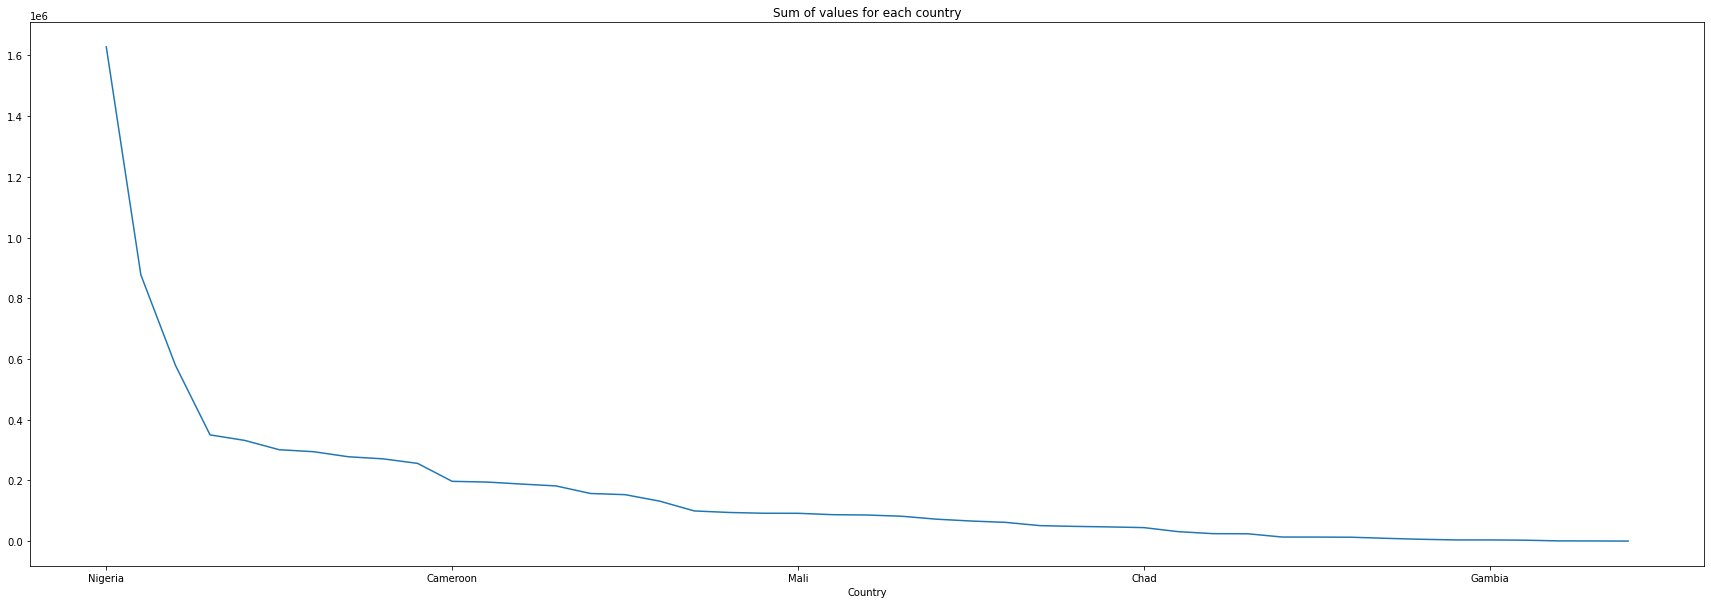

In [33]:
df1.groupby('Country')['Value'].sum().sort_values(ascending=False).plot(figsize=(30,10))
plt.title('Sum of values for each country');

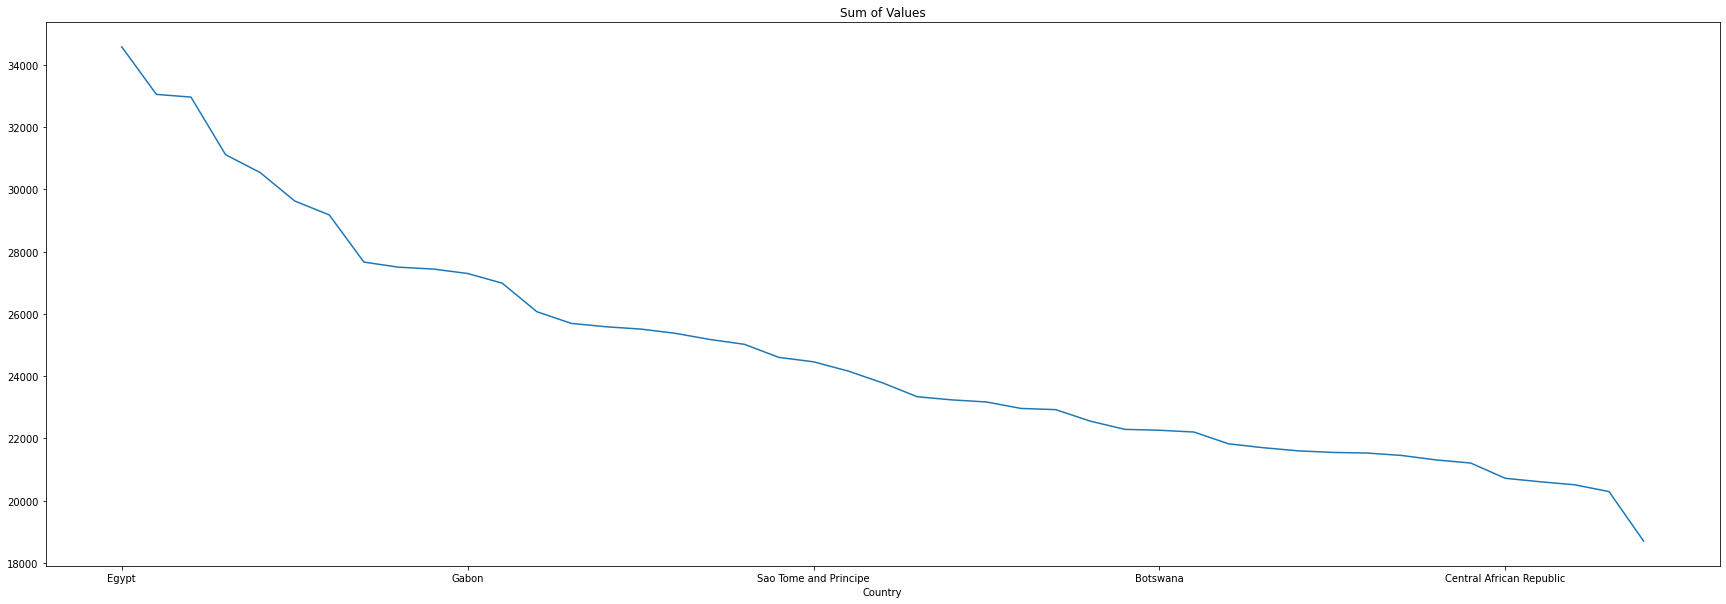

In [34]:
df2.groupby('Country')['Value'].sum().sort_values(ascending=False).plot(figsize=(30,10))
plt.title('Sum of Values');

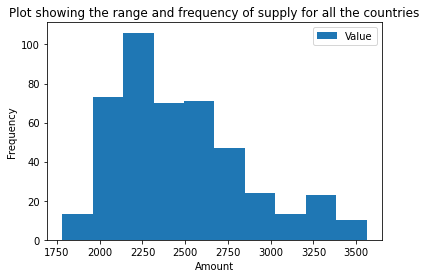

In [35]:
df2.plot(kind='hist')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.title('Plot showing the range and frequency of supply for all the countries');

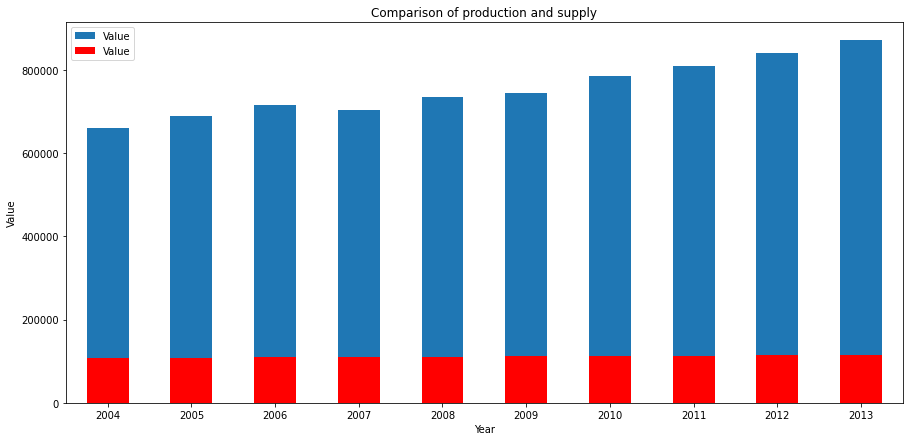

In [36]:
fig, ax = plt.subplots(figsize=(15,7))
df1.groupby(df1.index.year).sum().plot(kind='bar',ax=ax)
df2.groupby(df2.index.year).sum().plot(kind='bar',ax=ax,color='red')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Comparison of production and supply')
plt.xticks(rotation = 0)
plt.legend();

As seen in the bar chart above , the total production rate has increased over the years but the total supply/consumption rate has not changed much.